In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy_nn as nn

In [23]:
dataset = sns.load_dataset("iris")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
train_data = dataset.sample(frac=.8, random_state=42)
test_data = dataset.drop(train_data.index)

print(f'Training set size: {len(train_data)}')
print(f'Test set size: {len(test_data)}')

Training set size: 120
Test set size: 30


In [25]:
TARGET_NAME = "species"
NUM_VARIABLES = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [26]:
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor


In [27]:
test_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
37,4.9,3.6,1.4,0.1,setosa


In [28]:
target_classes_train = np.sort(train_data[TARGET_NAME].unique())
target_classes_test = np.sort(test_data[TARGET_NAME].unique())
target_classes_train

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
target_classes_test

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [30]:
train_data[TARGET_NAME] = train_data[TARGET_NAME].replace(target_classes_train, np.arange(target_classes_train.size))
test_data[TARGET_NAME] = test_data[TARGET_NAME].replace(target_classes_test, np.arange(target_classes_test.size))
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


In [31]:
train_ds = nn.data.Dataset(train_data, TARGET_NAME, [], NUM_VARIABLES)
test_ds = nn.data.Dataset(test_data, TARGET_NAME, [], NUM_VARIABLES)

In [32]:
model = nn.models.Sequential([
    nn.layers.core.Input((1, train_ds.num_of_features())),
    nn.layers.core.Dense(30, activation='relu'),
    nn.layers.core.Dense(3, activation='softmax')
])

In [33]:
model.compile(optimizer=nn.optimizers.SGD(lr=0.01, momentum=0.9),
              loss=nn.losses.CategoricalCrossEntropy(),
              metrics=['accuracy'])

In [34]:
train_ds.batch(16)

In [35]:
history = model.fit(train_ds,
          epochs=250)

Epoch 1/250:
0.003s - accuracy: 0.070 - loss: 1.136
Epoch 2/250:
0.010s - accuracy: 0.070 - loss: 1.130
Epoch 3/250:
0.005s - accuracy: 0.328 - loss: 1.114
Epoch 4/250:
0.004s - accuracy: 0.492 - loss: 1.099
Epoch 5/250:
0.003s - accuracy: 0.516 - loss: 1.081
Epoch 6/250:
0.002s - accuracy: 0.523 - loss: 1.067
Epoch 7/250:
0.003s - accuracy: 0.547 - loss: 1.051
Epoch 8/250:
0.002s - accuracy: 0.547 - loss: 1.032
Epoch 9/250:
0.002s - accuracy: 0.539 - loss: 1.018
Epoch 10/250:
0.002s - accuracy: 0.562 - loss: 1.001
Epoch 11/250:
0.002s - accuracy: 0.578 - loss: 0.982
Epoch 12/250:
0.002s - accuracy: 0.570 - loss: 0.967
Epoch 13/250:
0.002s - accuracy: 0.609 - loss: 0.947
Epoch 14/250:
0.002s - accuracy: 0.625 - loss: 0.941
Epoch 15/250:
0.002s - accuracy: 0.727 - loss: 0.926
Epoch 16/250:
0.003s - accuracy: 0.805 - loss: 0.899
Epoch 17/250:
0.002s - accuracy: 0.852 - loss: 0.878
Epoch 18/250:
0.002s - accuracy: 0.805 - loss: 0.874
Epoch 19/250:
0.002s - accuracy: 0.836 - loss: 0.854
Ep

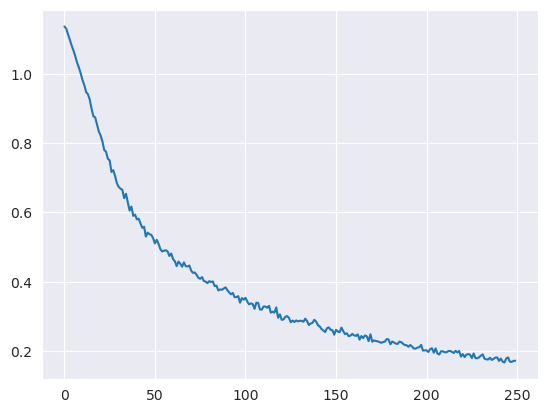

In [36]:
plt.plot(history.epochs, history.history['loss'])

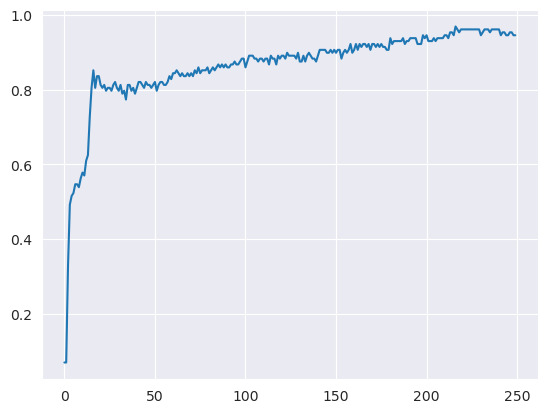

In [37]:
plt.plot(history.epochs, history.history['accuracy'])

In [38]:
y_pred = model.predict(test_ds.dataset.T)
y_true = test_ds.target.T
accuracy = nn.accuracy(y_true, y_pred)

print(f'Test set accuracy: {accuracy:.0%}')

Test set accuracy: 93%
